<a href="https://colab.research.google.com/github/pjbds/Satisfaccion-de-empleados/blob/main/An%C3%A1lisis_de_satisfacci%C3%B3n_de_empleados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vamos a trabajar con estos datos

**Lo primero será montar el drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Luego cargamos las bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Ahora vamos a cargar el dataset a trabajar**

In [ ]:
archivo = "/content/drive/MyDrive/Data Sets/Mod_employee_attrition.xlsx"
df= pd.read_excel(archivo)

**Comprobamos que haya cargado bien**


In [ ]:
df.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0


Carguemos el diccionario

In [ ]:
#Ordenemos este diccionario haciendo un dataframe con su información
diccionario = pd.DataFrame()

In [ ]:
#Comprobamos
diccionario

""


In [ ]:
#Creamos la primera columna:
diccionario["Column Name"] = ["Age", "Attrition", "BusinessTravel", "DailyRate", "Department", "DistanceFromHome",
                              "Education", "EducationField", "EmployeeCount", "EnvironmentSatisfaction",
                              "Gender", "HourlyRate", "JobInvolvement", "JobLevel", "JobRole", "JobSatisfaction",
                              "MaritalStatus", "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked", "Over18", "OverTime",
                              "PercentSalaryHike", "PerformanceRating", "RelationshipSatisfaction", "StandardHours",
                              "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear", "WorkLifeBalance",
                              "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]

In [ ]:
#Comprobamos
diccionario.head(2)

,Column Name
0,Age
1,Attrition


In [ ]:
#Luego creamos la segunda columna:
diccionario["Data Type"] = ["int", "Object", "Object", "Int", "Object", "Int",
                            "Int", "Object", "Int", "Int",
                            "Object", "Int", "Int", "Int", "Object", "Int",
                            "Object", "Int", "Int", "Int", "Object", "Object",
                            "Int", "Int", "Int", "Int",
                            "Int", "Int", "Int", "Int",
                            "Int", "Int", "Int", "Int"]

In [ ]:
#Comprobamos
diccionario.head(2)

,Column Name,Data Type
0,Age,int
1,Attrition,Object


In [ ]:
#Por último creamos la tercera columna:
diccionario["Description"] = ["Age of employee", "Employee leaving the company (no or yes)",
                            "How much the employee travels for work (no travel, travels frequently, or travels rarely)",
                            "Daily Rate", "Department (HR, R&D, or Sales)", "Distance from work to home",
                            "Education level: 1 = 'Below College'; 2 = 'College'; 3 = 'Bachelor'; 4 = 'Master'; 5 = 'Doctor'",
                            "Education field (HR, Life Sciences, Marketing, Medical Sciences, Technical, Other)",
                            "Number of employees", "Satisfaction with the environment: 1 = 'Low'; 2 = 'Medium'; 3 = 'High'; 4 = 'Very High'",
                            "Gender (female or male)", "Hourly rate", "Job Involvement: 1 = 'Low'; 2 = 'Medium'; 3 = 'High'; 4 = 'Very High'",
                            "Level of Job",
                            "Job Role (HC Rep, HR, Lab Technician, Manager, Managing Director, Research Director, Research Scientist, Sales Executive, Sales Representative)",
                            "Satisfaction with the job: 1 = 'Low'; 2 = 'Medium'; 3 = 'High'; 4 = 'Very High' ",
                            "Marital status (divorced, married, or single)", "Monthly salary", "Monthly rate",
                            "Number of companies worked at", "Over 18 (yes or no)", "Works overtime (yes or no)",
                            "Percentage increase in salary", "Performance Rating: 1 = 'Low'; 2 = 'Good'; 3 = 'Excellent'; 4 = 'Outstanding'",
                            "Relationship Satisfaction: 1 = 'Low'; 2 = 'Medium'; 3 = 'High'; 4 = 'Very High'", "Standard hours",
                            "Stock option level", "Total years worked", "Hours spent in training last year",
                            "	Work-life balance: 1 = 'Bad'; 2 = 'Good'; 3 = 'Better;' 4 = 'Best'",
                            "Total number of years at the company",
                            "Number of years in current role",
                            "Number of years since employee's last promotion",
                            "Number of years with current manager"]

In [ ]:
#Comprobamos
diccionario.head(2)

,Column Name,Data Type,Description
0,Age,int,Age of employee
1,Attrition,Object,Employee leaving the company (no or yes)


Exploremos el dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1475 non-null   int64 
 1   Attrition                 1475 non-null   object
 2   BusinessTravel            1475 non-null   object
 3   Department                1475 non-null   object
 4   DistanceFromHome          1475 non-null   int64 
 5   Education                 1475 non-null   int64 
 6   EducationField            1475 non-null   object
 7   EmployeeCount             1475 non-null   int64 
 8   EmployeeNumber            1475 non-null   int64 
 9   EnvironmentSatisfaction   1475 non-null   int64 
 10  Gender                    590 non-null    object
 11  HourlyRate                1475 non-null   object
 12  JobInvolvement            1475 non-null   int64 
 13  JobLevel                  1475 non-null   int64 
 14  JobRole                 

In [ ]:
#vamos a buscar duplicados
df.duplicated().sum()

5

Tenemos 5 duplicados totales. Analicemos las columnas para revisar si alguna corresponde a valores únicos, indicando que los duplicados son errores

Hay una columna llamada "employee number" que podría ser una columna de valores únicos, revisemos más a fondo

In [ ]:
df["EmployeeNumber"].nunique()

1470

podemos ver que sin considerar los 5 duplicados, esta columna sólo tiene valores únicos(1470 de 1475), por lo que vamos a eliminar estos duplicados para limpiar nuestro dataset

In [ ]:
df = df.drop_duplicates()

Comprobamos que los duplicados se hayan eliminado

In [ ]:
df.duplicated().sum()

0

Busquemos valores faltantes:

Usando el método .info y habíamos visto que sólo una columna(Gender) presenta valores nulos o faltantes. Veamos cuántos son

In [ ]:
df["Gender"].isna().sum()

882

Encontramos 882 valores faltantes en la columna "Gender".
Lo primero que vamos a hacer es revisar el porcentaje que representan estos datos faltantes el total del dataset

In [ ]:
((df["Gender"].isna().sum()*100)/df.shape[0]).round(1)

60.0

¡Los datos faltantes de la columna "Gender" representan un 60% del total! Esto significa más de la mitad de nuestro dataset y por lo tanto es información que no podemos eliminar. El único valor que identifica de forma única a cada empleado es el correspondiente a la columna "EmployeeNumber" del cual sabemos que no se repiten porque el conteo de valores únicos dentro de la columna es igual a la cantidad total de filas en el dataset

In [ ]:
df["EmployeeNumber"].nunique()

1470

In [ ]:
df.shape

(1470, 35)

Revisemos más a fondo nuestra columna con datos faltantes

In [ ]:
df["Gender"].value_counts()

Female    588
Name: Gender, dtype: int64

¡Sólo hay un valor en esta columna! Esto es información muy relevante, comprobemos

In [ ]:
df["Gender"].nunique()

1

Efectivamente tenemos sólo un valor dentro de esta columna de un esperado de dos según la información proporcionada sobre el dataset en el diccionario.

In [ ]:
diccionario.iloc[10:11, :]

,Column Name,Data Type,Description
10,Gender,Object,Gender (female or male)


Veamos qué porcentaje del total representan estos datos

In [ ]:
((df["Gender"].value_counts()*100)/df.shape[0]).round(1)

Female    40.0
Name: Gender, dtype: float64

Los valores "Female" Representan un 40% del total de los empleados. Según la encuesta ENCLA 2002 la distribución por genero, las mujeres alcanzan un 29,0%** de la fuerza laboral del país.

**Datos obtenidos de la página oficial de la dirección del trabajo
[fuente](https://www.dt.gob.cl/portal/1629/articles-62202_recurso_13.pdf)

En base a los datos mencionados, el porcentaje de mujeres en nuestro dataset y el hecho de que sólo tenemos el valor "Female" en la columna "Gender", vamos a concluir que los datos faltantes corresponden a los hombres de la compañía, motivo por el cual vamos a imputar estos faltantes con el valor "Male"

In [ ]:
df["Gender"].fillna("Male", inplace=True)

Comprobamos

In [ ]:
df["Gender"].isna().sum()

0

In [ ]:
df["Gender"].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

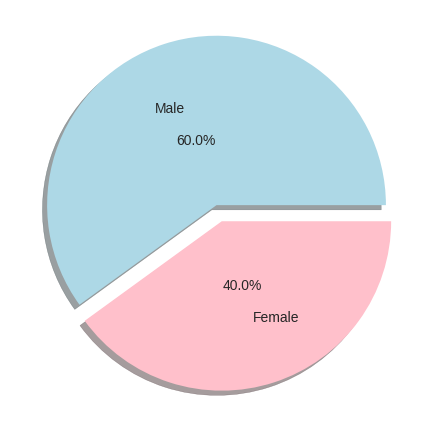

In [ ]:
plt.style.use('seaborn-v0_8')
explode = (0.1, 0)
labels = "Male", "Female"
sizes = [882, 588]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', pctdistance=0.4, labeldistance=.6,
       colors=['lightblue', 'pink', 'yellow', 'lightgreen'], shadow=True, explode= explode)
plt.show();

Podemos ver en el gráfico que el porcentaje de hombres y mujeres es muy cercano al medido en Chile, por lo que la imputación de los valores parece adecuada

Revisemos ahora que el tipo de dato de cada columna se ajuste a lo indicado en el diccionario

In [ ]:
diccionario[["Column Name", "Data Type"]].head(1)

,Column Name,Data Type
0,Age,int


Comparemos el diccionario con los tipos de datos del dataframe

In [ ]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                  object
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
DailyRate                    int64
WeeklyRate                   int64
YearlyRate                   int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

llevemos esta información a un dataframe

In [ ]:
tipos_de_datos = df.dtypes

df_tipos_de_datos = pd.DataFrame({"Column Name": tipos_de_datos.index, "Data Type": tipos_de_datos.values})

Comprobemos

In [ ]:
df_tipos_de_datos.head(1)

,Column Name,Data Type
0,Age,int64


Comparemos sus valores

In [ ]:
diccionario["Data Type"] == df_tipos_de_datos["Data Type"]

ValueError: ignored

Veamos por qué nos da error

In [ ]:
diccionario[["Column Name", "Data Type"]].shape

(34, 2)

In [ ]:
df_tipos_de_datos.shape

(35, 2)

Podemos ver que el tamaño del diccionario es menor al del datadrame, lo que indica que nos falta una columna en el diccionario.

Encontremos cuál es creando variables ordenadas para poder comparar los datos

In [ ]:
diccionario_por_tipo = diccionario["Data Type"].sort_values
df_por_tipo = df_tipos_de_datos["Data Type"].sort_values
diccionario_por_nombre = diccionario["Column Name"].sort_values
df_por_nombre = df_tipos_de_datos["Column Name"].sort_values

In [ ]:
diccionario_por_nombre

<bound method Series.sort_values of 0                          Age
1                    Attrition
2               BusinessTravel
3                    DailyRate
4                   Department
5             DistanceFromHome
6                    Education
7               EducationField
8                EmployeeCount
9      EnvironmentSatisfaction
10                      Gender
11                  HourlyRate
12              JobInvolvement
13                    JobLevel
14                     JobRole
15             JobSatisfaction
16               MaritalStatus
17               MonthlyIncome
18                 MonthlyRate
19          NumCompaniesWorked
20                      Over18
21                    OverTime
22           PercentSalaryHike
23           PerformanceRating
24    RelationshipSatisfaction
25               StandardHours
26            StockOptionLevel
27           TotalWorkingYears
28       TrainingTimesLastYear
29             WorkLifeBalance
30              YearsAtCompany
31 

In [ ]:
df_por_nombre


<bound method Series.sort_values of 0                          Age
1                    Attrition
2               BusinessTravel
3                   Department
4             DistanceFromHome
5                    Education
6               EducationField
7                EmployeeCount
8               EmployeeNumber
9      EnvironmentSatisfaction
10                      Gender
11                  HourlyRate
12              JobInvolvement
13                    JobLevel
14                     JobRole
15             JobSatisfaction
16               MaritalStatus
17                   DailyRate
18                  WeeklyRate
19                  YearlyRate
20          NumCompaniesWorked
21                      Over18
22                    OverTime
23           PercentSalaryHike
24           PerformanceRating
25    RelationshipSatisfaction
26               StandardHours
27            StockOptionLevel
28           TotalWorkingYears
29       TrainingTimesLastYear
30             WorkLifeBalance
31 

Observando esta información, podemos ver que hay diferencias entre lo que nos indica el diccionario y la información presente en nuestro dataset. Debido a esto, abandonaremos la comparación automática y lo haremos de forma manual.

In [ ]:
diccionario_por_nombre

<bound method Series.sort_values of 0                          Age
1                    Attrition
2               BusinessTravel
3                    DailyRate
4                   Department
5             DistanceFromHome
6                    Education
7               EducationField
8                EmployeeCount
9      EnvironmentSatisfaction
10                      Gender
11                  HourlyRate
12              JobInvolvement
13                    JobLevel
14                     JobRole
15             JobSatisfaction
16               MaritalStatus
17               MonthlyIncome
18                 MonthlyRate
19          NumCompaniesWorked
20                      Over18
21                    OverTime
22           PercentSalaryHike
23           PerformanceRating
24    RelationshipSatisfaction
25               StandardHours
26            StockOptionLevel
27           TotalWorkingYears
28       TrainingTimesLastYear
29             WorkLifeBalance
30              YearsAtCompany
31 

In [ ]:
df_por_nombre

<bound method Series.sort_values of 0                          Age
1                    Attrition
2               BusinessTravel
3                   Department
4             DistanceFromHome
5                    Education
6               EducationField
7                EmployeeCount
8               EmployeeNumber
9      EnvironmentSatisfaction
10                      Gender
11                  HourlyRate
12              JobInvolvement
13                    JobLevel
14                     JobRole
15             JobSatisfaction
16               MaritalStatus
17                   DailyRate
18                  WeeklyRate
19                  YearlyRate
20          NumCompaniesWorked
21                      Over18
22                    OverTime
23           PercentSalaryHike
24           PerformanceRating
25    RelationshipSatisfaction
26               StandardHours
27            StockOptionLevel
28           TotalWorkingYears
29       TrainingTimesLastYear
30             WorkLifeBalance
31 

**Diferencias encontradas:**


>**"MonthlyIncome":** *Tiene información en el diccionario y no está en el dataset.*

>**"MonthlyRate":** *Tiene información en el diccionario y no está en el dataset.*

>**"EmployeeNumber":** *Está en el dataset y no tiene información en el diccionario.*

>**"WeeklyRate":** *Está en el dataset y no tiene información en el diccionario.*

>**"YearlyRate":** *Está en el dataset y no tiene información en el diccionario.*

>**"HourlyRate":** *Es "Object" y debería ser "Int".*

>**"YearsAtCompany":** *Es "Object" y debería ser "Int".*

En base a la información encontrada, vamos a trabajar sobre las columnas cuyos datos no corresponden a lo indicado en diccionario

Revisemos los valores únicos en busca de alguna anomalía

In [ ]:
df["HourlyRate"].unique()

array([94, 61, 92, 56, 40, 79, 81, 67, 44, '94_', 84, 49, 31, 93, 50, 51,
       80, 96, 78, 45, 82, 53, 83, 58, 72, 48, 42, 41, 86, 97, 75, 33, 37,
       73, 98, 36, 47, 71, 30, 43, 99, 59, 95, 57, 76, 87, 66, 55, 32, 52,
       70, 62, 64, 63, 60, 100, 46, 39, 77, 35, 91, 54, 34, 90, 65, 88,
       85, 89, 68, 69, 74, 38], dtype=object)

Se puede observar que hay un valor en la columna "HourlyRate" que está ingresado de forma diferente al resto(94_)

Vamos a crear una variable sin este valor para poder revisar las estadísticas de estas columna

In [ ]:
#Creamos el filtro
filtro = df["HourlyRate"] != "94_"
#Creamos la variable filtrada
df_filtrado = df[filtro]
#Cambiamos el tipo de dato de la columna a analizar en nuestra variable
df_filtrado["HourlyRate"].astype(int)

0       94
1       61
2       92
3       56
4       40
        ..
1470    41
1471    42
1472    87
1473    63
1474    82
Name: HourlyRate, Length: 1469, dtype: int64

Ahora obtenemos las estadísticas de esta columna

In [ ]:
df_filtrado["HourlyRate"].describe()

count     1469
unique      71
top         66
freq        29
Name: HourlyRate, dtype: int64

In [ ]:
df_filtrado["HourlyRate"].min()

30

In [ ]:
df_filtrado["HourlyRate"].max()

100

In [ ]:
df_filtrado["HourlyRate"].mean()

65.87202178352621

Podemos ver que el valor 94 está dentro de lo esperado para esta columna y por eso vamos a concluir que "94_" fue un error. Vamos a corregir esto reemplazando este valor por sus componentes numéricos

In [ ]:
df["HourlyRate"].replace("94_", "94", inplace=True)

Comprobamos

In [ ]:
df["HourlyRate"].unique()

array([94, 61, 92, 56, 40, 79, 81, 67, 44, '94', 84, 49, 31, 93, 50, 51,
       80, 96, 78, 45, 82, 53, 83, 58, 72, 48, 42, 41, 86, 97, 75, 33, 37,
       73, 98, 36, 47, 71, 30, 43, 99, 59, 95, 57, 76, 87, 66, 55, 32, 52,
       70, 62, 64, 63, 60, 100, 46, 39, 77, 35, 91, 54, 34, 90, 65, 88,
       85, 89, 68, 69, 74, 38], dtype=object)

Ahora que todos los valores son números, cambiamos el tipo de dato al indicado en el diccionario

In [ ]:
df["HourlyRate"] = df["HourlyRate"].astype(int)

comprobamos

In [ ]:
df["HourlyRate"].dtype

dtype('int64')

Ahora revisemos la segunda columna en búsqueda de anomalía en sus datos

In [ ]:
df["YearsAtCompany"].unique()

array([6, 10, 0, 8, 2, 7, 1, 9, 5, 4, 25, 3, 12, 14, 22, '5!', 15, 27, 21,
       17, 11, 13, 37, 16, 20, 40, 24, 33, 19, 36, 18, 29, 31, 32, 34, 26,
       30, 23], dtype=object)

Se puede observar que hay un valor en la columna "YearsAtCompany" que está ingresado de forma diferente al resto(5!)

Vamos a repetir el proceso anterior

In [ ]:
#Creamos el filtro
filtro1 = df["YearsAtCompany"] != "5!"
#Creamos la variable filtrada
df_filtrado1 = df[filtro1]
#Cambiamos el tipo de dato de la columna a analizar en nuestra variable
df_filtrado1["YearsAtCompany"].unique()

array([6, 10, 0, 8, 2, 7, 1, 9, 5, 4, 25, 3, 12, 14, 22, 15, 27, 21, 17,
       11, 13, 37, 16, 20, 40, 24, 33, 19, 36, 18, 29, 31, 32, 34, 26, 30,
       23], dtype=object)

Obtenemos las estadísticas de esta columna

In [ ]:
df_filtrado1["YearsAtCompany"].describe()

count     1469
unique      37
top          5
freq       195
Name: YearsAtCompany, dtype: int64

In [ ]:
df_filtrado1["YearsAtCompany"].min()

0

In [ ]:
df_filtrado1["YearsAtCompany"].max()

40

In [ ]:
df_filtrado1["YearsAtCompany"].mean()

7.009530292716134

Podemos ver que el valor 5 está dentro de lo esperado para esta columna y muy cerca de la media. Por eso vamos a concluir que "5!" fue un error. Vamos a corregir esto reemplazando este valor por sus componentes numéricos

In [ ]:
df["YearsAtCompany"].replace("5!", "5", inplace=True)

Comprobamos

In [ ]:
df["YearsAtCompany"].unique()

array([6, 10, 0, 8, 2, 7, 1, 9, 5, 4, 25, 3, 12, 14, 22, '5', 15, 27, 21,
       17, 11, 13, 37, 16, 20, 40, 24, 33, 19, 36, 18, 29, 31, 32, 34, 26,
       30, 23], dtype=object)

Ahora que todos los valores son números, cambiamos el tipo de dato al indicado en el diccionario

In [ ]:
df["YearsAtCompany"] = df["YearsAtCompany"].astype(int)

Comprobamos

In [ ]:
df["YearsAtCompany"].dtype

dtype('int64')

Ahora todas las columnas tienen el tipo de dato que indica el diccionario

Ahora que ya arreglamos las columnas númericas, revisemos las columnas categóricas y sus datos en relación a lo indicado en el diccionario

In [ ]:
df["Attrition"].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
x = 1
diccionario.iloc[x:x+1, :]

,Column Name,Data Type,Description
1,Attrition,Object,Employee leaving the company (no or yes)


In [ ]:
df["BusinessTravel"].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [ ]:
x = 2
diccionario.iloc[x:x+1, :]

,Column Name,Data Type,Description
2,BusinessTravel,Object,How much the employee travels for work (no tra...


Podemos ver tres diferencias:

**Travel_Rarely:** Debería ser "travels rarely".

**Travel_Frecuently:** Debería ser "travels frecuently".

Vamos a conservar estos datos así puesto que esta diferencia no induce a error

**Non-Travel:** Debería ser "no travel". Vamos a cambiar el guión medio por un guión bajo para darle homogeneidad a nuestra columna y que no genere problemas más adelante cuando usemos estos datos para alimentar un modelo de predicción. Vamos a cambiar "Non-Travel" por "No_Travel"


In [ ]:
df["BusinessTravel"].replace("Non-Travel", "No_Travel", inplace=True)

Comprobamos

In [ ]:
df["BusinessTravel"].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'No_Travel'], dtype=object)

In [ ]:
df["Department"].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [ ]:
x = 4
diccionario.iloc[x:x+1, :]

,Column Name,Data Type,Description
4,Department,Object,"Department (HR, R&D, or Sales)"


Se observa una diferencia entre lo indicado en el diccionario y la información del dataset, sin embargo, se ve una relación entre las iniciales de los datos y por eso vamos a considerar que es sólo una diferencia de formato y no de tipo, conservando el dataset como está ya que los valores de la columna son más descriptivos de este modo

In [ ]:
df["EducationField"].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [ ]:
x = 7
diccionario.iloc[x:x+1, :]

,Column Name,Data Type,Description
7,EducationField,Object,"Education field (HR, Life Sciences, Marketing,..."


Podemos ver tres diferencias:

**Human Resources:** *Debería ser "HR".*

**Technical Degree:** *Debería ser "Technical"*.

Usaremos la misma lógica de la columna anterior y conservaremos la información como está

**Medical:** *Debería ser "Medical Sciences"*. Vamos a reemplazar estos valores por los indicados en el diccionario ya que son más descriptivos



In [ ]:
df["EducationField"].replace("Medical", "Medical Sciences", inplace=True)

Comprobamos

In [ ]:
df["EducationField"].unique()

array(['Life Sciences', 'Other', 'Medical Sciences', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

Aquí vendría "Gender" pero esta columna ya la corregimos

In [ ]:
df["JobRole"].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [ ]:
x = 14
diccionario.iloc[x:x+1, :]

,Column Name,Data Type,Description
14,JobRole,Object,"Job Role (HC Rep, HR, Lab Technician, Manager,..."


Podemos ver cuatro diferencias:

**Healthcare Representative:** Debería ser "HC REP".

**Human Resources:** Debería ser "HR".

**Laboratory Technician:** Debería ser "Technician".

Usaremos la misma lógica de la columna anterior y conservaremos la información como está

**Manufacturing Director:** Este nombre no aparece en el diccionario. Sin embargo, hay uno presente en el diccionario que no está en el dataframe que es "Managing Director". Si no tuviéramos el diccionario, este sería un escenario muy complejo, ya que ambos son puestos que existen dentro de grandes empresas. En este caso y dado que el diccionario nos indica un valor que no está, que el valor en el dataset no está en diccionario, que ambos valores compuestos comparten la segunda parte(Manager) y que su primera parte comparte las primeras 3 letras(Man) y las últimas 3 letras(ing), vamos a concluir que hubo un error en la carga de los datos y vamos a reemplazar este valor del dataset por el encontrado en el diccionario.

In [ ]:
df["JobRole"].replace("Manufacturing Director", "Managing Director", inplace=True)

Comprobamos

In [ ]:
df["JobRole"].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Managing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [ ]:
df["MaritalStatus"].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [ ]:
x = 16
diccionario.iloc[x:x+1, :]

,Column Name,Data Type,Description
16,MaritalStatus,Object,"Marital status (divorced, married, or single)"


In [ ]:
df["Over18"].unique()

array(['Y'], dtype=object)

Este resultado se ve extraño, revisemos más a fondo

In [ ]:
df["Over18"].value_counts()

Y    1470
Name: Over18, dtype: int64

Podemos ver que hay un único valor en esta columna("Y") lo cual en este caso no presenta problema ya que tiene sentido que todos los trabajadores de la empresa sean mayores de edad

Comparamos con el diccionario

In [ ]:
x = 20
diccionario.iloc[x:x+1, :]

,Column Name,Data Type,Description
20,Over18,Object,Over 18 (yes or no)


Podemos observar que hay una diferencia entre la información del dataset "Y" y la información del diccionario "yes" o "no".
En este caso, dado que lo mencionado en el diccionario es más descriptivo que que la letra presente en el dataset y que podemos relacionar de forma lógica la letra Y a la palabra "Yes", vamos a reemplazar este valor por la informción del diccionario.

In [ ]:
df["Over18"].replace("Y", "Yes", inplace=True)

Comprobamos

In [ ]:
df["Over18"].unique()

array(['Yes'], dtype=object)

In [ ]:
df["OverTime"].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
x = 21
diccionario.iloc[x:x+1, :]

,Column Name,Data Type,Description
21,OverTime,Object,Works overtime (yes or no)


Podemos observar una diferencia con el diccionario ya que en el diccionario se indica todo con minúsculas y en el dataset encontramos la primera letra con mayúscula. Debido a que esta no es una diferencia sustancial y para unificar el criterio que usamos en la columna anterior donde reemplazamos "Y" por "Yes" vamos a dejar estos datos como están

Vamos a analizar las columnas numéricas en busca de datos anómalos

In [ ]:
df.head(1)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5


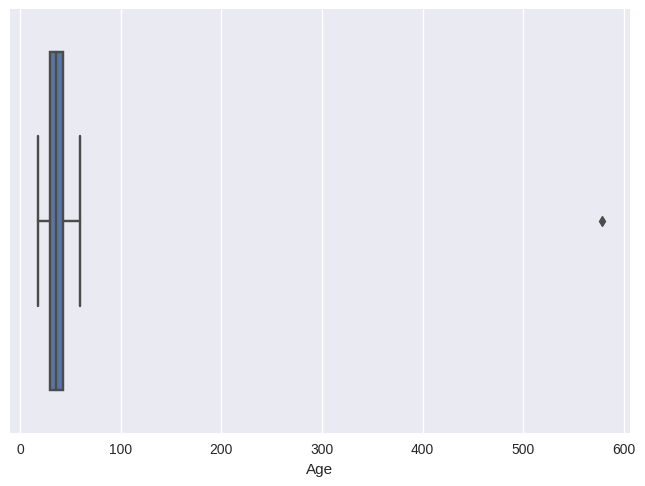

In [ ]:
sns.boxplot(x="Age", data=df);

¡El boxplot nos muestra un único valor muy lejos de lo esperado! Vamos a buscarlo

In [ ]:
df[df["Age"] > 500]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
99,578,No,Travel_Rarely,Sales,10,4,Medical Sciences,1,131,4,...,3,80,0,38,1,2,37,10,1,8


Encontramos un valor (578) muy por sobre el resto de los datos, como se puede apreciar en el boxplot. Ya que esta columna corresponde a la edad, podemos decir con propiedad que este es un error, ya que las personas más longevas del mundo en la actualidad no superan los 120 años([fuente](https://es.statista.com/grafico/27337/las-personas-mas-longevas-del-mundo/)).
Ahora el problema es qué hacer con este valor. Ya que tiene tres dígitos, no tenemos una forma segura de imputar este valor, ya que podría ser cualquiera de las combinaciones de los mismos o ser un error aún mayor y que no corresponda a ninguno. Es por este motivo que en virtud de no contaminar nuestro dataset con información incorrecta, vamos a eliminar esta fila.

In [ ]:
df.drop(index = 99, inplace=True)

In [ ]:
df.shape

(1469, 35)

Comprobamos

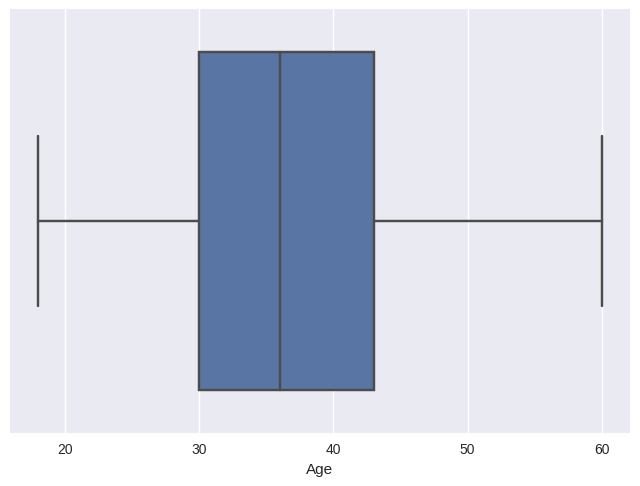

In [ ]:
sns.boxplot(x="Age", data=df);

Ahora podemos observar un boxplot acorde a lo esperado

In [ ]:
df.head(1)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5


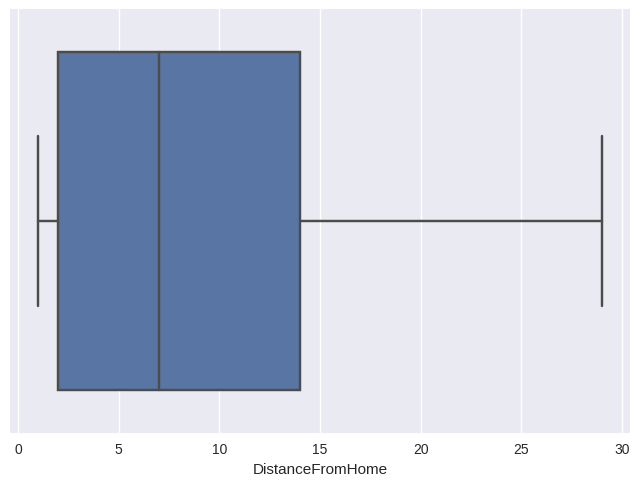

In [ ]:
sns.boxplot(x="DistanceFromHome", data=df);

Podemos observar los datos están sesgados hacia la izquierda, hacia una menor distancia entre el lugar de trabajo y su casa. Sin embargo, no hay valores fuera del rango y, en este caso, realmente no hay un rango esperable, ya que no existen distancias "límite" para un trabajo en la era digital, pudiendo la gente trabajar de forma remota desde el otro lado del mundo

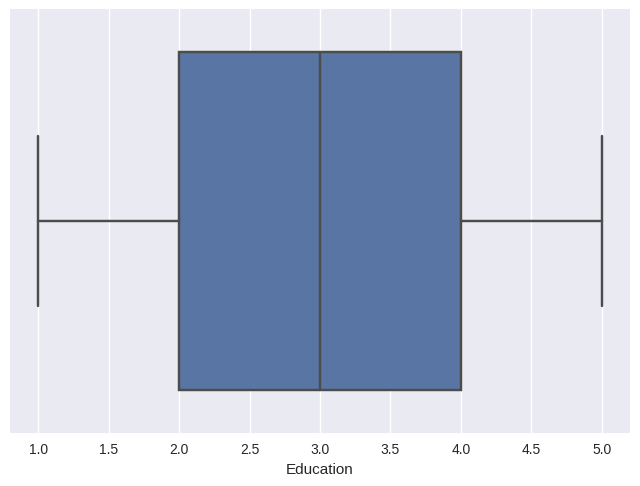

In [ ]:
sns.boxplot(x="Education", data=df);

In [ ]:
diccionario.iloc[6:7,:]

,Column Name,Data Type,Description
6,Education,Int,Education level: 1 = 'Below College'; 2 = 'Col...


Todos los datos se encuentran dentro del rango esperado

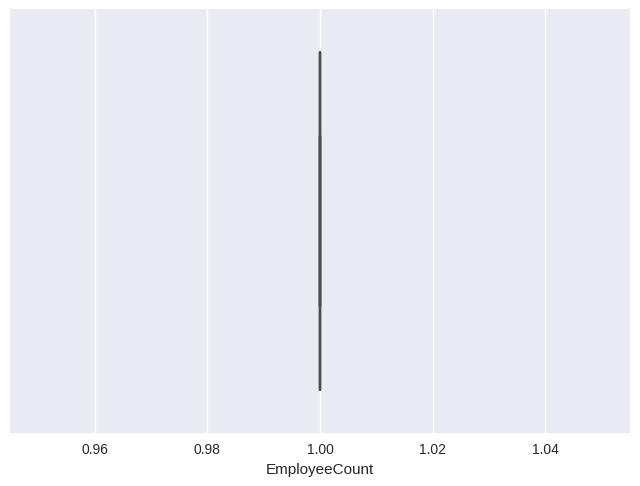

In [ ]:
sns.boxplot(x="EmployeeCount", data=df);

In [ ]:
diccionario.iloc[8:9,:]

,Column Name,Data Type,Description
8,EmployeeCount,Int,Number of employees


Dado que cada fila corresponde a un único trabajador, es lógico que este valor sea "1" en todas las filas y no parece entregar información adicional a nuestro dataset. Analizaremos más adelante si mantener esta columna.

In [ ]:
df.head(1)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5


"EmployeeNumber" sabemos que corresponde a un identificador único de cada trabajador porque ya lo analizamos

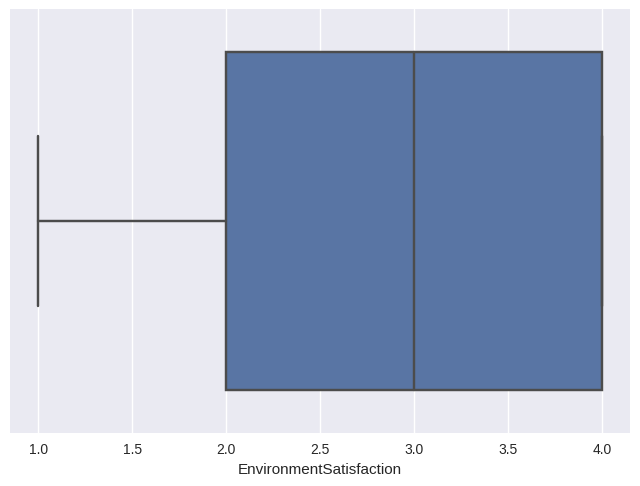

In [ ]:
sns.boxplot(x="EnvironmentSatisfaction", data=df);

In [ ]:
diccionario.iloc[9:10,:]

,Column Name,Data Type,Description
9,EnvironmentSatisfaction,Int,Satisfaction with the environment: 1 = 'Low'; ...


Podemos observar que los valores se encuentran dentro de lo esperado

Veamos qué columnas son numéricas para continuar nuestro análisis

In [ ]:
df.dtypes[df.dtypes != object]

Age                         int64
DistanceFromHome            int64
Education                   int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
DailyRate                   int64
WeeklyRate                  int64
YearlyRate                  int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

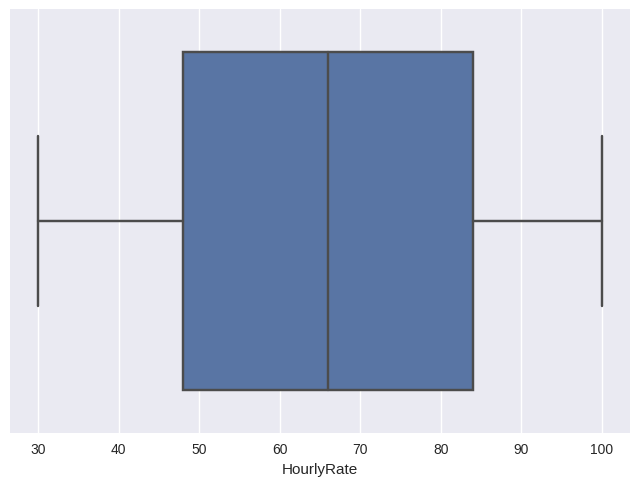

In [ ]:
sns.boxplot(x="HourlyRate", data=df);

In [ ]:
diccionario.iloc[11:12,:]

,Column Name,Data Type,Description
11,HourlyRate,Int,Hourly rate


Podemos observar unboxplot bastante ordenado, simétrico, sin datos anómalos. En este caso y dado que no hay un límite para los salarios, no habría forma de saber si un dato es erróneo

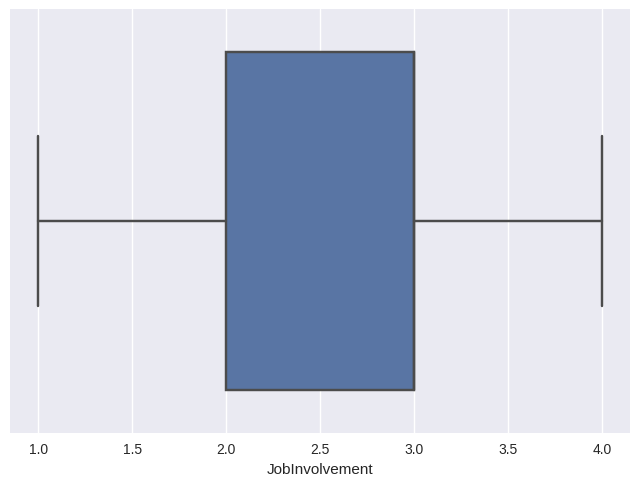

In [ ]:
sns.boxplot(x="JobInvolvement", data=df);

In [ ]:
diccionario.iloc[12:13,:]

,Column Name,Data Type,Description
12,JobInvolvement,Int,Job Involvement: 1 = 'Low'; 2 = 'Medium'; 3 = ...


Podemos ver que los datos están dentro de lo esperado

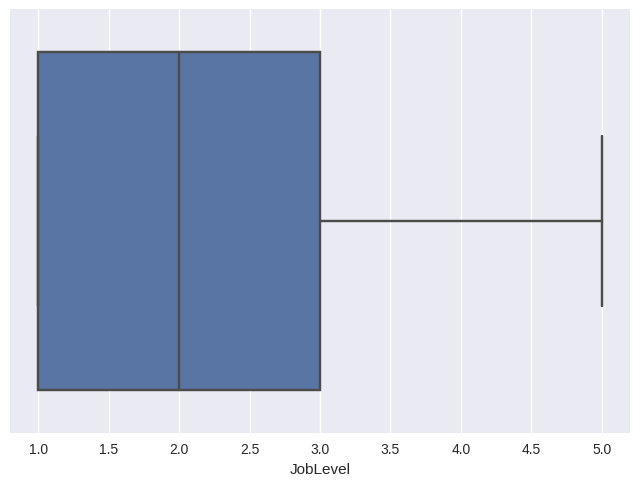

In [ ]:
sns.boxplot(x="JobLevel", data=df);

In [ ]:
diccionario.iloc[13:14,:]

,Column Name,Data Type,Description
13,JobLevel,Int,Level of Job


Los datos se observan muy sesgados a la izquierda, sin outliers. No hay información sobre lo esperado en esta columna

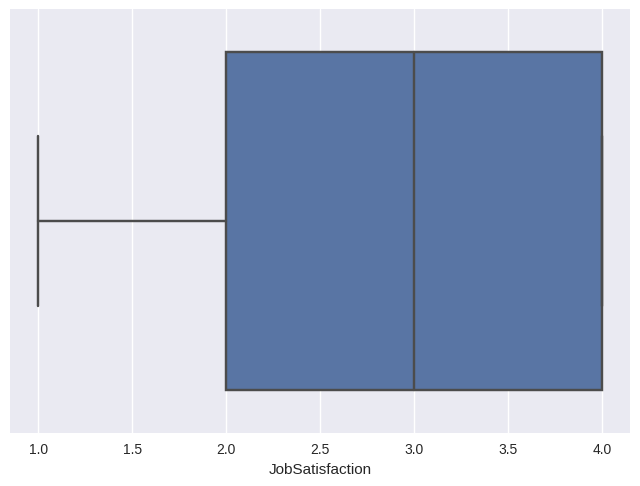

In [ ]:
sns.boxplot(x="JobSatisfaction", data=df);

In [ ]:
diccionario.iloc[15:16,:]

,Column Name,Data Type,Description
15,JobSatisfaction,Int,Satisfaction with the job: 1 = 'Low'; 2 = 'Med...


Los valores se encuentran dentro de lo esperado

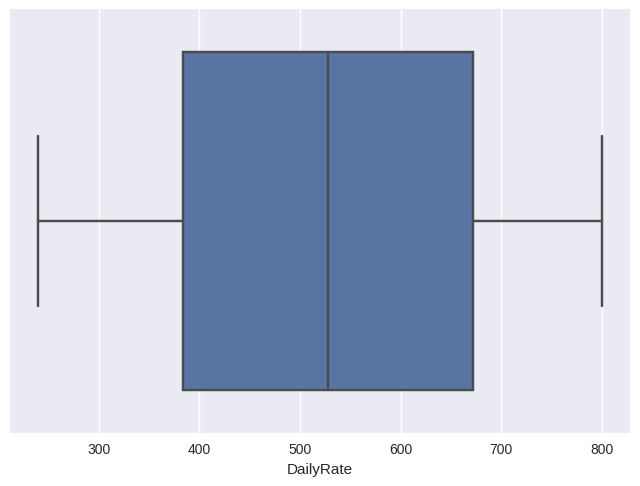

In [ ]:
sns.boxplot(x="DailyRate", data=df);

In [ ]:
diccionario.iloc[3:4,:]

,Column Name,Data Type,Description
3,DailyRate,Int,Daily Rate


No hay información en el diccionario sobre los valores esperados. Sin embargo, al hacer una comparación rápida entre los gráficos de "HourlyRate" y "DailyRate" podemos ver una relación que tiene sentido, ya que, por ejemplo: el valor máximo por hora es 100, máximo por dia es 800 y si consideramos una jornada laboral de 8 horas esto nos da con exactitud lo encontrado en los gráficos

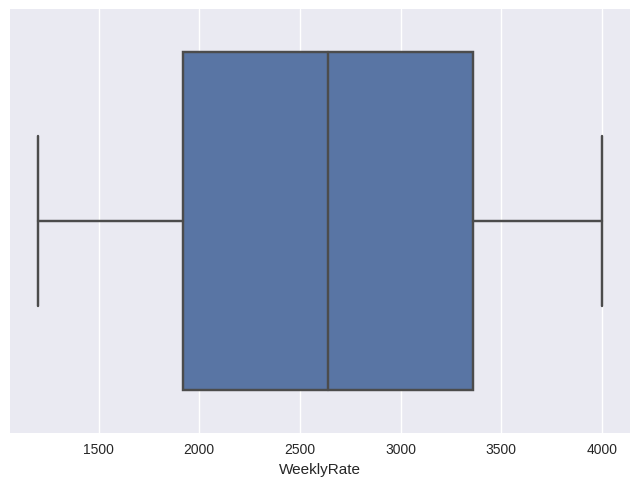

In [ ]:
sns.boxplot(x="WeeklyRate", data=df);

No hay información en el diccionario sobre los valores esperados ya que esta columna no aparece mencionada. Sin embargo, al hacer una comparación rápida entre los gráficos de "DailyRate" y "WeeklyRate" podemos ver una relación que tiene sentido, ya que, por ejemplo: el valor máximo por dia es 800, máximo por semana es 400 y si consideramos una semana laboral de 5 dias esto nos da con exactitud lo encontrado en los gráficos

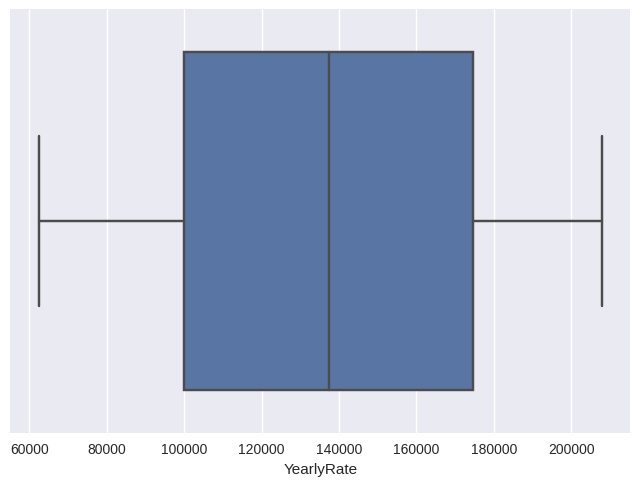

In [ ]:
sns.boxplot(x="YearlyRate", data=df);

No hay información en el diccionario sobre los valores esperables ya que esta columna no aparece mencionada. Sin embargo, al hacer una comparación rápida entre los gráficos de "Weekly" y "YearlyRate" podemos ver una relación que tiene sentido, ya que, por ejemplo: el valor máximo por semana es 4000, máximo por año está alrededor de los 210000 y si consideramos que un año tiene 52 semanas esto nos da una relación correcta entre los máximos de cada gráfico

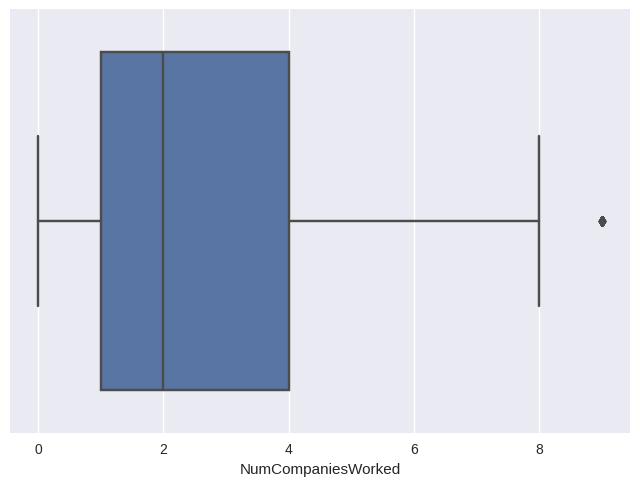

In [ ]:
sns.boxplot(x="NumCompaniesWorked", data=df);

In [ ]:
diccionario.iloc[19:20,:]


,Column Name,Data Type,Description
19,NumCompaniesWorked,Int,Number of companies worked at


In [ ]:
df["NumCompaniesWorked"].max()

9

In [ ]:
df["Age"].describe()

count    1469.000000
mean       36.909462
std         9.121902
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

No hay información en el diccionario sobre los valores esperados. Sin embargo, si consideramos que la edad de los trabajadores varía entre 18 y 60 años y que el único valor outlier es 9 que representa la cantidad de empresas en las que han trabajado, podemos decir que son valores bajos y que estos trabajadores en su mayoría se quedan mucho tiempo en la misma empresa si lo comparamos con el promedio de años que los Chilenos duran en un trabajo que es 2,6 años [Fuente](https://www.latercera.com/noticia/chilenos-se-quedan-promedio-26-anos-empleo/)

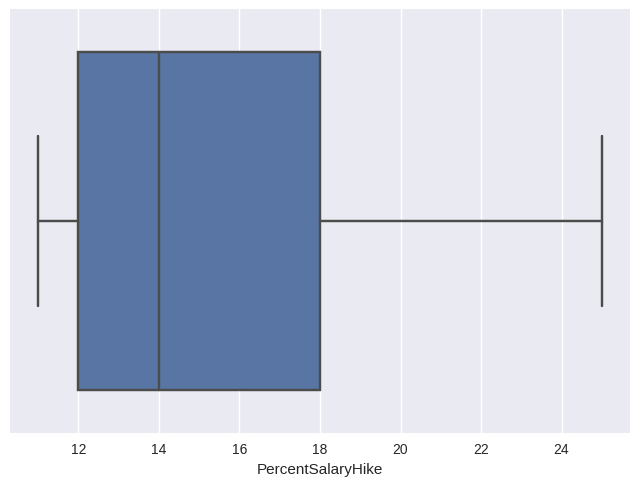

In [ ]:
sns.boxplot(x="PercentSalaryHike", data=df);

In [ ]:
diccionario.iloc[22:23,:]


,Column Name,Data Type,Description
22,PercentSalaryHike,Int,Percentage increase in salary


No vemos datos outliers y vemos que el máximo se ubica cerca del 25% de aumento de salario, lo que es un número alto pero que no escapa de lo posible o esperable

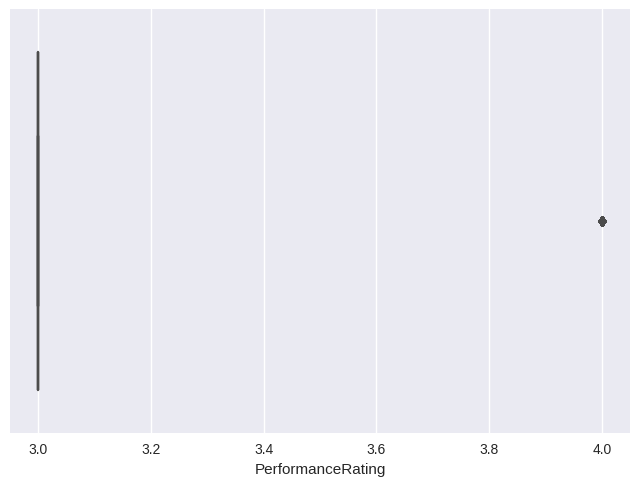

In [ ]:
sns.boxplot(x="PerformanceRating", data=df);

In [ ]:
diccionario.iloc[23:24,:]

,Column Name,Data Type,Description
23,PerformanceRating,Int,Performance Rating: 1 = 'Low'; 2 = 'Good'; 3 =...


In [ ]:
df["PerformanceRating"].value_counts()

3    1243
4     226
Name: PerformanceRating, dtype: int64

Podemos ver al revisar los valores únicos y su cantidad por qué este gráfico se ve así: sin bigotes, con la media, Q1, Q3, mínimo y máximo todo en 3 y con el valor 4 como outlier

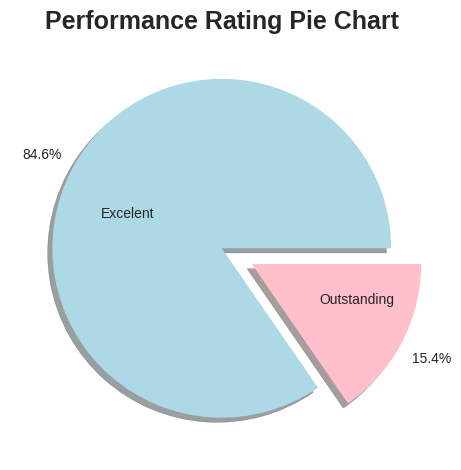

In [ ]:
plt.style.use('seaborn-v0_8')
explode = (0, 0.2)
labels = "Excelent", "Outstanding"
sizes = [1243, 226]
fig, ax = plt.subplots()
ax.set_title("Performance Rating Pie Chart", size=18, weight="bold")
ax.pie(sizes, labels=labels, autopct='%1.1f%%', pctdistance=1.2, labeldistance=.45,
       colors=['lightblue', 'pink'], shadow=True, explode= explode);
plt.show();

Podemos ver en este gráfico que el 15,4% tiene un Performance Rating sobresaliente que es su valor máximo y que todo el resto tiene Performance Rating Excelente, mostrando así que el 100% de los trabajadores se encuentra en la mitad más alta de esta evaluación

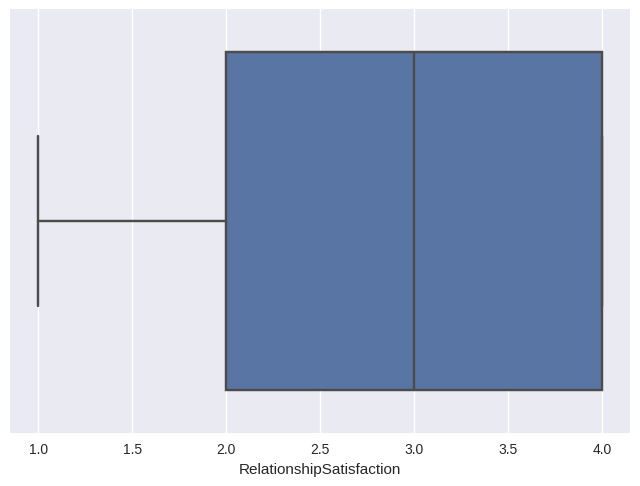

In [ ]:
sns.boxplot(x="RelationshipSatisfaction", data=df);

In [ ]:
diccionario.iloc[24:25,:]

,Column Name,Data Type,Description
24,RelationshipSatisfaction,Int,Relationship Satisfaction: 1 = 'Low'; 2 = 'Med...


Podemos ver no hay valores outliers y que la mayoría se encuentra entre los niveles de satisfacción medio y muy alto

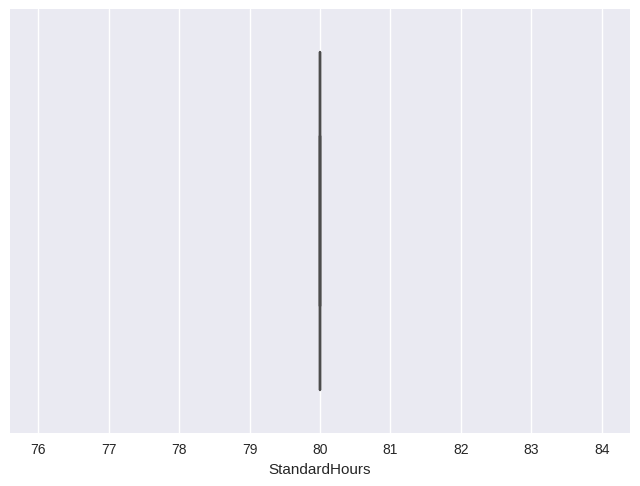

In [ ]:
sns.boxplot(x="StandardHours", data=df);

In [ ]:
diccionario.iloc[25:26,:]

,Column Name,Data Type,Description
25,StandardHours,Int,Standard hours


In [ ]:
df["StandardHours"].value_counts()

80    1469
Name: StandardHours, dtype: int64

Podemos observar en el gráfico un único valor y al revisar los valores únicos de la columna podemos comprobar que así es, lo que significa que todos los trabajadores de la empresa tienen la misma cantidad estándar de horas: 80

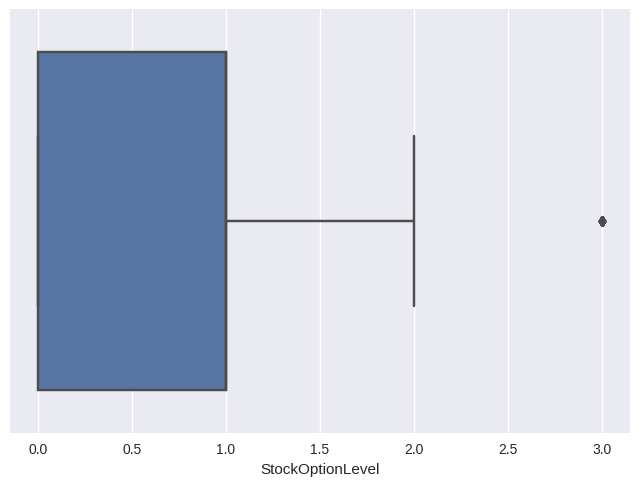

In [ ]:
sns.boxplot(x="StockOptionLevel", data=df);

In [ ]:
diccionario.iloc[26:27,:]

,Column Name,Data Type,Description
26,StockOptionLevel,Int,Stock option level


In [ ]:
df["StockOptionLevel"].value_counts()

0    630
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

In [ ]:
(630 + 596)/1469

0.8345813478556842

Podemos ver que la muestra está muy sesgada hacia la izquierda y que el 83.4% de los datos se encuentra entre 0 y 1 de StockOptionLevel

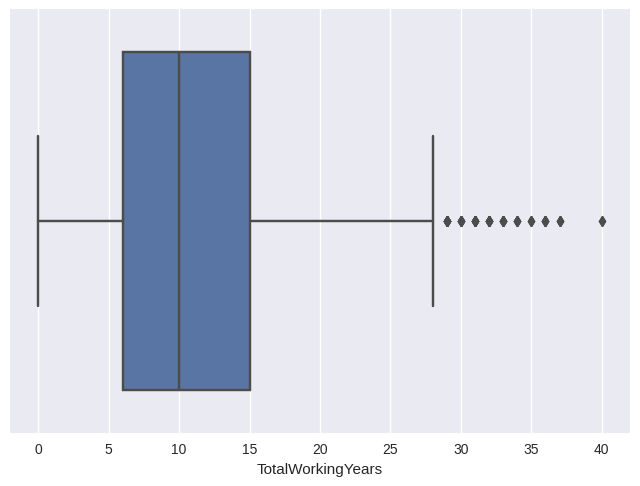

In [ ]:
sns.boxplot(x="TotalWorkingYears", data=df);

In [ ]:
diccionario.iloc[27:28,:]

,Column Name,Data Type,Description
27,TotalWorkingYears,Int,Total years worked


In [ ]:
df["Age"].describe()

count    1469.000000
mean       36.909462
std         9.121902
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

Podemos ver que nuestros datos de total de años trabajando va desde 0 a 40 años y que las edades de nuestra muestra van desde 18 a 60 años, lo cual nos dice que la muestra está totalmente dentro de lo esperado

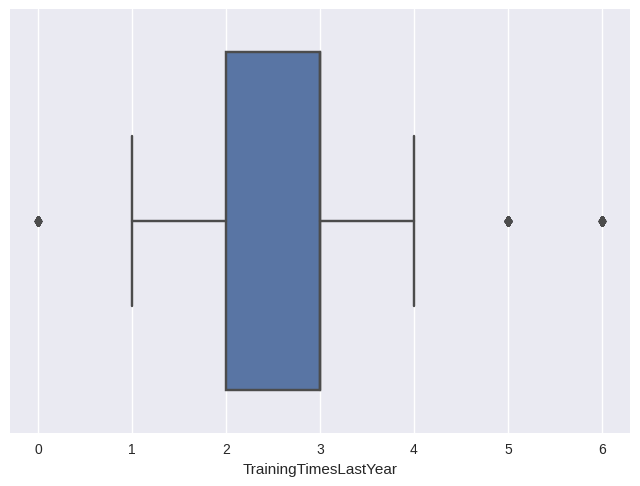

In [ ]:
sns.boxplot(x="TrainingTimesLastYear", data=df);

In [ ]:
diccionario.iloc[28:29,:]

,Column Name,Data Type,Description
28,TrainingTimesLastYear,Int,Hours spent in training last year


El diccionario no indica rango de valores para esta columna y dado que el máximo valor es 6 y que representa la cantidad de horas en entrenamiento el año anterior, podemos decir que es un número bajo y que está dentro de lo esperado

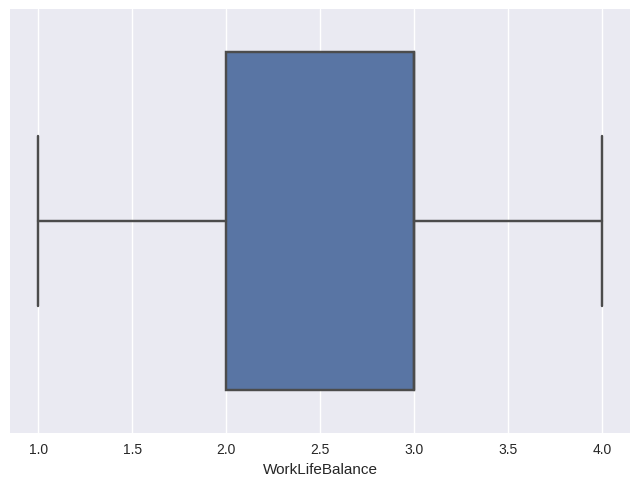

In [ ]:
sns.boxplot(x="WorkLifeBalance", data=df);

In [ ]:
diccionario.iloc[29:30,:]

,Column Name,Data Type,Description
29,WorkLifeBalance,Int,\tWork-life balance: 1 = 'Bad'; 2 = 'Good'; 3 ...


Todos los valores se encuentran dentro de lo esperado, sin outliers

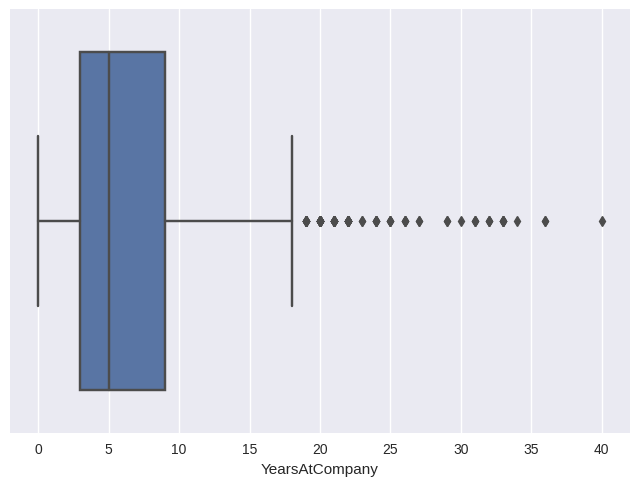

In [ ]:
sns.boxplot(x="YearsAtCompany", data=df);

Podemos ver que nuestros datos de total de años trabajador va desde 0 a 40 años y que las edades de nuestra muestra que van desde 18 a 60 años, lo cual nos dice que la muestra está totalmente dentro de lo esperado

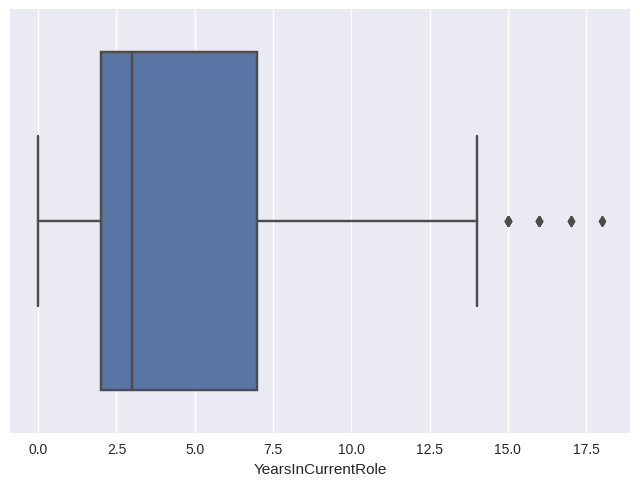

In [ ]:
sns.boxplot(x="YearsInCurrentRole", data=df);

In [ ]:
diccionario.iloc[31:32,:]

,Column Name,Data Type,Description
31,YearsInCurrentRole,Int,Number of years in current role


Todos los valores se encuentran dentro de lo esperado, podemos observar 4 valores outliers relacionados a la mayor cantidad de años en el mismo puesto

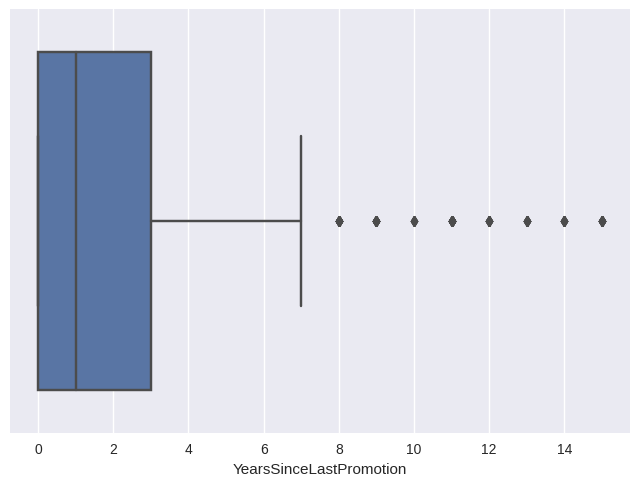

In [ ]:
sns.boxplot(x="YearsSinceLastPromotion", data=df);

In [ ]:
diccionario.iloc[32:33,:]

,Column Name,Data Type,Description
32,YearsSinceLastPromotion,Int,Number of years since employee's last promotion


Todos los valores se encuentran dentro de lo esperado, podemos observar 8 valores outliers relacionados a la mayor cantidad de años desde el último ascenso

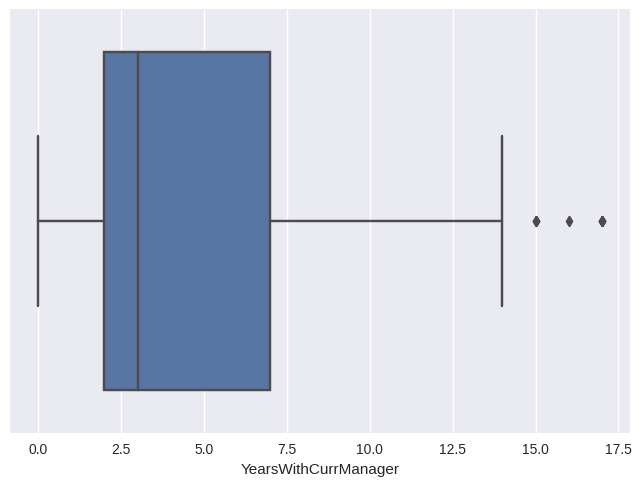

In [ ]:
sns.boxplot(x="YearsWithCurrManager", data=df);

In [ ]:
diccionario.iloc[33:34,:]

,Column Name,Data Type,Description
33,YearsWithCurrManager,Int,Number of years with current manager


Todos los valores se encuentran dentro de lo esperado, podemos observar 3 valores outliers relacionados a la mayor cantidad de años con su gerente actual

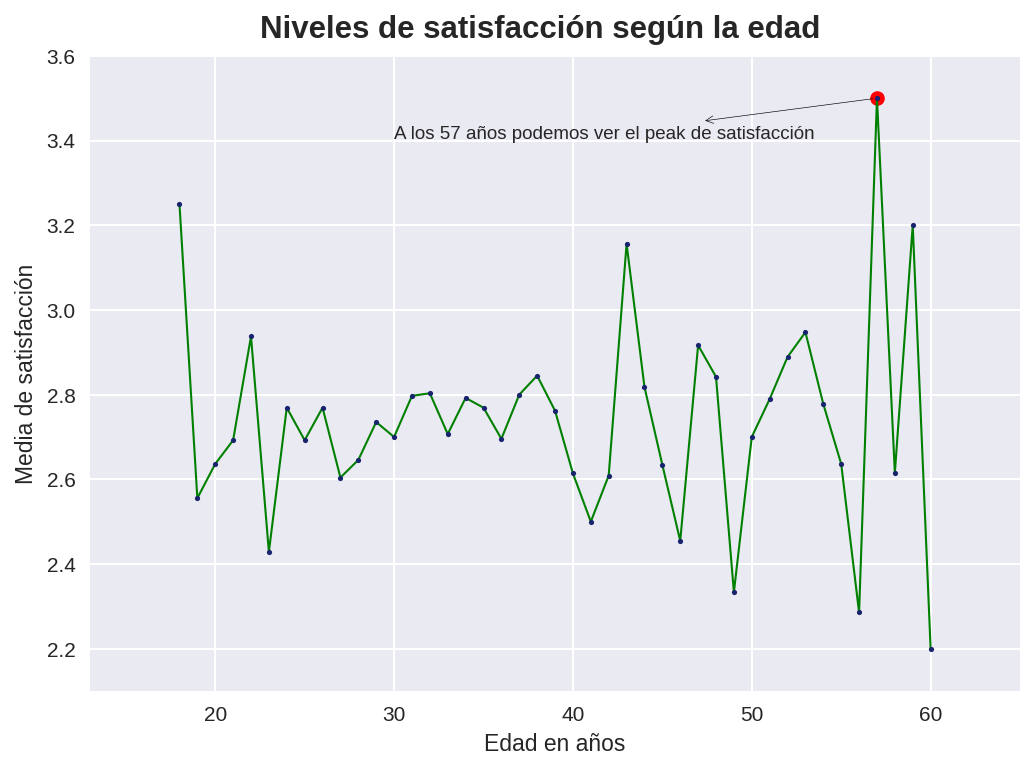

In [ ]:
fig = plt.figure(dpi=150)
fig.suptitle("Niveles de satisfacción según la edad", fontsize=15, fontweight="bold", y = 0.93)
ax = fig.add_subplot(1,1,1)
ax.plot(57,3.5, 'ro')
ax.annotate("A los 57 años podemos ver el peak de satisfacción", xy=(57,3.5), xytext=(30,3.405), fontsize=9, arrowprops=dict(arrowstyle="<-", color='black'))
plt.plot (df.groupby(["Age"])["JobSatisfaction"].mean(),
          'g.-',
         markerfacecolor="#18246e",
         lw=1,
         ms=5);
plt.axis([13,65,2.1,3.6]);
ax.set_xlabel("Edad en años")
ax.set_ylabel("Media de satisfacción")
plt.show();

Hicimos este gráfico buscando una relación entre la edad y la media de satisfacción de los trabajadores, sin embargo, no parece haber una tendencia clara entre estos dos indicadores.

Lo que sí podemos ver es que en los grupos etáreos más extremos de la muestra es donde se ve mayor variación en la media de satisfacción, siendo el grupo más estable el que se encuentra entre los 25 y los 35 años.

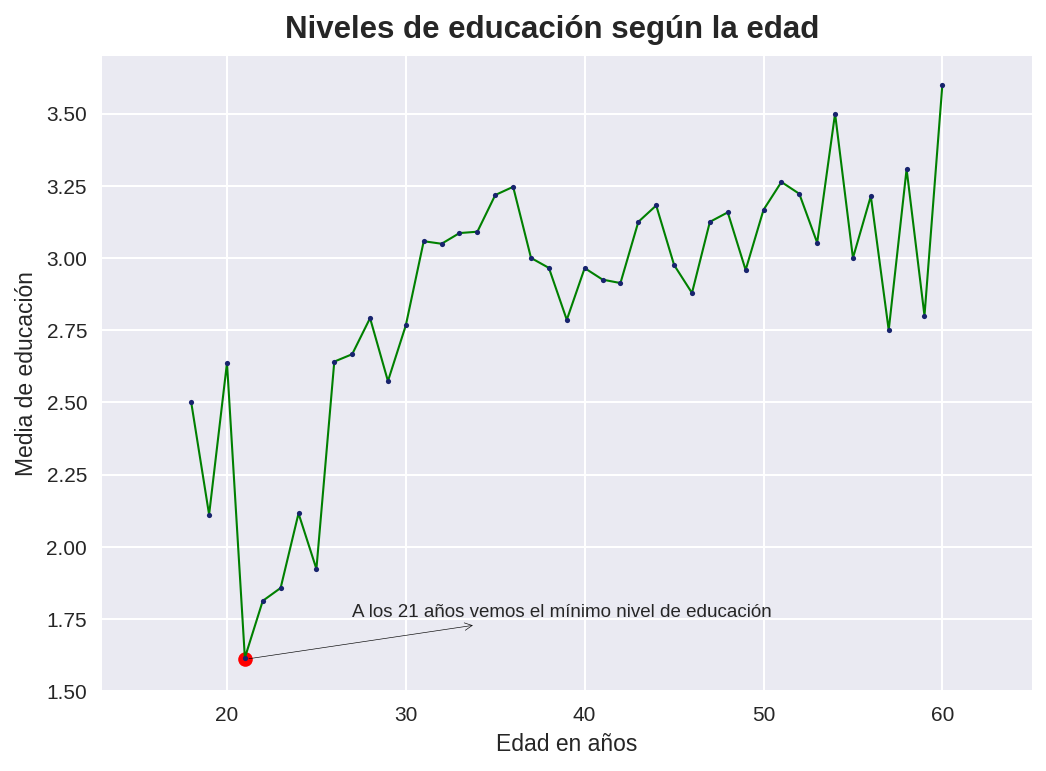

In [ ]:
fig = plt.figure(dpi=150)
fig.suptitle("Niveles de educación según la edad", fontsize=15, fontweight="bold", y = 0.93)
ax = fig.add_subplot(1,1,1)
ax.plot(21,1.61, 'ro')
ax.annotate("A los 21 años vemos el mínimo nivel de educación", xy=(21,1.61), xytext=(27,1.758), fontsize=9, arrowprops=dict(arrowstyle="<-", color='black'))
plt.plot (df.groupby(["Age"])["Education"].mean(),
          'g.-',
         markerfacecolor="#18246e",
         lw=1,
         ms=5);
plt.axis([13,65,1.5,3.7]);
ax.set_xlabel("Edad en años")
ax.set_ylabel("Media de educación")
plt.show();

Al observar el gráfico podemos notar una tendencia marcada de proporción directa entre la edad y la media del nivel de educación. Esta relación entre los dos indicadores tiene lógica si consideramos la duración de los pregrados y posgrados que son necesarios para subir un nivel en esta escala.